Лабораторная Работа №1

# Выполнил: Балашов Максим Александрович

## Группы: 18-Ивт-2


### Вариант №2: Отмена рейсов

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder
%matplotlib inline


In [418]:
flights_df = pd.read_csv ('flights.csv', nrows=1000000)
print("flights")
print(flights_df.head())

flights
   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...         408.0   
1            LAX                 PBI                   10  ...         741.0   
2            SFO                 CLT                   20  ...         811.0   
3            LAX                 MIA                   20  ...         756.0   
4            SEA                 ANC                   25  ...         259.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0   

In [159]:
flights_df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,960842.000000,960842.000000,960145.000000,960145.000000,...,1000000.000000,959117.000000,957394.000000,1000000.000000,1000000.000000,221041.000000,221041.000000,221041.000000,221041.000000,221041.000000
mean,2015.0,1.630873,14.087290,3.942253,2259.305292,1322.605368,1333.892931,11.525092,16.735891,1357.706468,...,1505.500062,1492.772831,7.904573,0.002474,0.040132,13.879651,0.057921,18.040721,22.955108,3.631589
std,0.0,0.659208,8.846599,1.957458,1799.970834,470.183312,482.295869,39.451588,10.204402,482.567175,...,485.664098,506.662151,42.383991,0.049678,0.196269,25.747212,1.803159,46.037156,41.895492,23.792253
min,2015.0,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,-61.000000,1.000000,1.000000,...,1.000000,1.000000,-82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.000000,6.000000,2.000000,756.000000,920.000000,929.000000,-5.000000,11.000000,944.000000,...,1121.000000,1116.000000,-12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,2.000000,14.000000,4.000000,1727.000000,1320.000000,1329.000000,-1.000000,14.000000,1343.000000,...,1525.000000,1522.000000,-3.000000,0.000000,0.000000,4.000000,0.000000,2.000000,4.000000,0.000000
75%,2015.0,2.000000,22.000000,6.000000,3488.000000,1720.000000,1731.000000,11.000000,19.000000,1745.000000,...,1915.000000,1917.000000,12.000000,0.000000,0.000000,19.000000,0.000000,18.000000,29.000000,0.000000
max,2015.0,3.000000,31.000000,7.000000,9794.000000,2359.000000,2400.000000,1988.000000,225.000000,2400.000000,...,2359.000000,2400.000000,1971.000000,1.000000,1.000000,830.000000,241.000000,1971.000000,1313.000000,1152.000000


### 1. Подсчитайте количество отменённых рейсов.

In [253]:
print("Количество отменённых рейсов = ")
print(flights_df[flights_df["CANCELLED"] length=1000000].shape[0])

Количество отменённых рейсов = 
40132



### 2. Определите аэропорт, рейсы для которого отменяются наиболее часто.

In [157]:
count = flights_df.groupby(["ORIGIN_AIRPORT"])[["CANCELLED"]].count()
print ("Аэропорт, рейсы для которого отменяются наиболее часто", count.sort_values(['CANCELLED'],ascending=False).head(1))

Аэропорт, рейсы для которого отменяются наиболее часто                 CANCELLED
ORIGIN_AIRPORT           
ATL                 63413


### 9. Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию.

In [282]:
count = flights_df.groupby(["AIRLINE"])[["DEPARTURE_DELAY"]].count()
print("Авиакомпания с максимальными задержками по отправке", count.sort_values(["DEPARTURE_DELAY"], ascending=False).head(1))


Авиакомпания с максимальными задержками по отправке          DEPARTURE_DELAY
AIRLINE                 
WN                204472


In [155]:
count = flights_df.groupby(["AIRLINE"])[["ARRIVAL_DELAY"]].count()
print("Авиакомпания с максимальными задержками по отправке", count.sort_values(["ARRIVAL_DELAY"], ascending=False).head(1))

Авиакомпания с максимальными задержками по отправке          ARRIVAL_DELAY
AIRLINE               
WN              203896


### 4. Подсчитайте для трёх выбранных авиакомпаний: количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов.

In [200]:
print("Количество рейсов = NK ", flights_df[flights_df["AIRLINE"] == "NK"]["FLIGHT_NUMBER"].shape[0]-1)
print("Количество отменённых рейсов = NK ", flights_df[(flights_df["AIRLINE"] == "NK") & (flights_df["CANCELLED"] == 1)].shape[0]-1)
print("Количество перенаправленных рейсов = NK ", flights_df[(flights_df["AIRLINE"] == "NK") & (flights_df['DIVERTED'] == 1)].shape[0]-1)
print("_____________________________________________________ ")
print("Количество рейсов = UA ", flights_df[flights_df["AIRLINE"] == "UA"]["FLIGHT_NUMBER"].shape[0]-1)
print("Количество отменённых рейсов = UA ", flights_df[(flights_df["AIRLINE"] == "UA") & (flights_df["CANCELLED"] == 1)].shape[0]-1)
print("Количество перенаправленных рейсов = UA ", flights_df[(flights_df["AIRLINE"] == "UA") & (flights_df["DIVERTED"] == 1)].shape[0]-1)
print("_____________________________________________________ ")
print("Количество рейсов = DL ", flights_df[flights_df["AIRLINE"]=="DL"]["FLIGHT_NUMBER"].shape[0]-1)
print("Количество отменённых рейсов = DL ", flights_df[(flights_df["AIRLINE"] == "DL") & (flights_df["CANCELLED"] == 1)].shape[0]-1)
print("Количество перенаправленных рейсов = DL ", flights_df[(flights_df["AIRLINE"] == "DL") & (flights_df["DIVERTED"] == 1)].shape[0]-1)

Количество рейсов = NK  18698
Количество отменённых рейсов = NK  460
Количество перенаправленных рейсов = NK  24
_____________________________________________________ 
Количество рейсов = UA  83514
Количество отменённых рейсов = UA  2383
Количество перенаправленных рейсов = UA  158
_____________________________________________________ 
Количество рейсов = DL  140423
Количество отменённых рейсов = DL  2858
Количество перенаправленных рейсов = DL  244


In [160]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1000000 non-null  int64  
 1   MONTH                1000000 non-null  int64  
 2   DAY                  1000000 non-null  int64  
 3   DAY_OF_WEEK          1000000 non-null  int64  
 4   AIRLINE              1000000 non-null  object 
 5   FLIGHT_NUMBER        1000000 non-null  int64  
 6   TAIL_NUMBER          992291 non-null   object 
 7   ORIGIN_AIRPORT       1000000 non-null  object 
 8   DESTINATION_AIRPORT  1000000 non-null  object 
 9   SCHEDULED_DEPARTURE  1000000 non-null  int64  
 10  DEPARTURE_TIME       960842 non-null   float64
 11  DEPARTURE_DELAY      960842 non-null   float64
 12  TAXI_OUT             960145 non-null   float64
 13  WHEELS_OFF           960145 non-null   float64
 14  SCHEDULED_TIME       999998 non-null   float64
 15 

### 5. Определите скорость полёта для каждого рейса, скорость полёта среднюю для трёх выбранных авиакомпаний. 

In [262]:
flights_df["flight_speed"] = flights_df["DISTANCE"] / flights_df["AIR_TIME"]
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,flight_speed
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8.568047
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8.859316
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8.631579
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9.077519
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.276382


In [192]:
print("Средняя скорость полёта = AS ", flights_df[(flights_df["AIRLINE"] == "AS")]["flight_speed"].mean())
print("Средняя скорость полёта = AA ", flights_df[(flights_df["AIRLINE"] == "AA")]["flight_speed"].mean())
print("Средняя скорость полёта = US ", flights_df[(flights_df["AIRLINE"] == "US")]["flight_speed"].mean())
print("Средняя скорость полёта = DL ", flights_df[(flights_df["AIRLINE"] == "DL")]["flight_speed"].mean())
print("Средняя скорость полёта = UA ", flights_df[(flights_df["AIRLINE"] == "UA")]["flight_speed"].mean())

Средняя скорость полёта = AS  7.196521300088667
Средняя скорость полёта = AA  7.185435287317874
Средняя скорость полёта = US  6.798382283107063
Средняя скорость полёта = DL  6.940139715820667
Средняя скорость полёта = UA  7.407453722437658


### 3. Определите коэффициент корреляции Пирсона и Спирмена между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом. Оцените значение p-value. Постройте плотность распределения признаков.

In [162]:
Pearson_day = pearsonr(flights_df["CANCELLED"],flights_df["DAY_OF_WEEK"])
Spearman_day = spearmanr(flights_df["CANCELLED"],flights_df["DAY_OF_WEEK"])

print("День недели")
print("Коэффициент корреляции Пирсона: ",Pearson_day)
print("Коэффициент корреляции Спирмена: ",Spearman_day)
                          
if (Spearman_day[1] < 0.05):
    print("p-value is good")
else:
    print("p-value is not good")

День недели
Коэффициент корреляции Пирсона:  (-0.034625008244161155, 7.423572761791261e-263)
Коэффициент корреляции Спирмена:  SpearmanrResult(correlation=-0.035746328621575174, pvalue=5.020553437595337e-280)
p-value is good


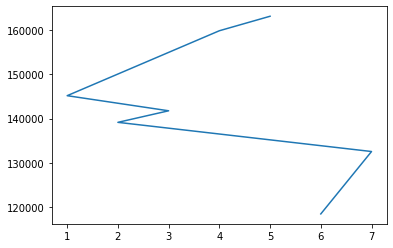

In [321]:
flights_df["DAY_OF_WEEK"].value_counts().plot()


In [164]:
Pearson_month = pearsonr(flights_df["CANCELLED"],flights_df["MONTH"])
Spearman_month = spearmanr(flights_df["CANCELLED"],flights_df["MONTH"])

print("Месяц")
print("Коэффициент корреляции Пирсона: ",Pearson_month)
print("Коэффициент корреляции Спирмена: ",Spearman_month)
      
if (Spearman_day[1] < 0.05):
    print("p-value is good")
else:
    print("p-value is not good")

Месяц
Коэффициент корреляции Пирсона:  (0.08088313333310305, 0.0)
Коэффициент корреляции Спирмена:  SpearmanrResult(correlation=0.07898743126884478, pvalue=0.0)
p-value is good


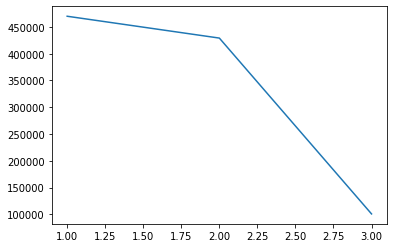

In [320]:
flights_df["MONTH"].value_counts().plot()

In [166]:
label_encoder = LabelEncoder()
airlines = pd.Series(label_encoder.fit_transform(flights_df["AIRLINE"]))

Pearson_airlines = pearsonr(flights_df["CANCELLED"],airlines)
Spearman_airlines = spearmanr(flights_df["CANCELLED"],airlines)

print("Авиакомпания")
print("Коэффициент корреляции Пирсона: ",Pearson_airlines)
print("Коэффициент корреляции Спирмена: ",Spearman_airlines)
      
if (Spearman_day[1] < 0.05):
    print("p-value is good")
else:
    print("p-value is not good")

Авиакомпания
Коэффициент корреляции Пирсона:  (-0.016440619615354913, 9.616646136757818e-61)
Коэффициент корреляции Спирмена:  SpearmanrResult(correlation=-0.016110450084979345, pvalue=2.1190667409249646e-58)
p-value is good


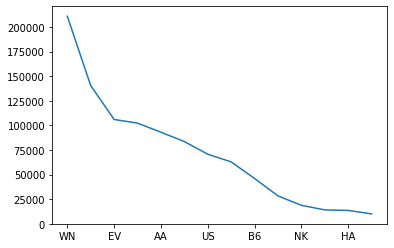

In [319]:
flights_df["AIRLINE"].value_counts().plot()

In [169]:
airport = pd.Series(label_encoder.fit_transform(flights_df["ORIGIN_AIRPORT"]))

Pearson_airport = pearsonr(flights_df["CANCELLED"], airport)
Spearman_airport = spearmanr(flights_df["CANCELLED"], airport)

print("Аэропорт")
print("Коэффициент корреляции Пирсона: ",Pearson_airport)
print("Коэффициент корреляции Спирмена: ",Spearman_airport)
       
if (Spearman_day[1] < 0.05):
    print("p-value is good")
else:
    print("p-value is not good")

Аэропорт
Коэффициент корреляции Пирсона:  (-0.02875458339874719, 6.695821507745994e-182)
Коэффициент корреляции Спирмена:  SpearmanrResult(correlation=-0.027344950266289834, pvalue=1.0790116605366485e-164)
p-value is good


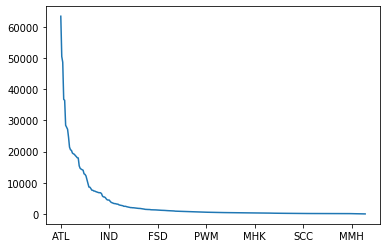

In [323]:
flights_df["ORIGIN_AIRPORT"].value_counts().plot()

### 6. Визуализируйте тепловую карту частоты отмены рейсов. По одной оси – дни, по другой оси – рейс (для двух аэропортов).

In [401]:
flights_df = pd.read_csv ('flights.csv',nrows=100000)

In [402]:
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


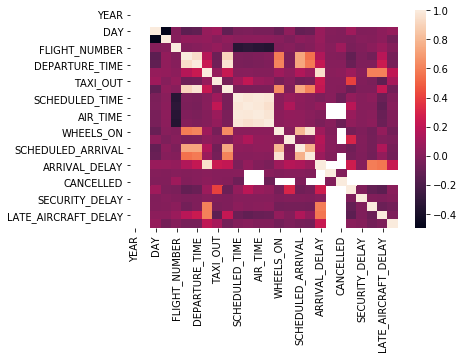

In [403]:
sns.heatmap(flights_df.corr());



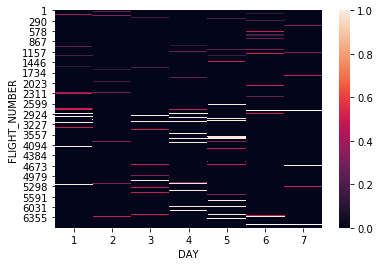

In [410]:
flights_df[flights_df['ORIGIN_AIRPORT']=='ORD']
flights_df = flights_df.pivot_table(values="CANCELLED", index="FLIGHT_NUMBER", columns="DAY")
sns.heatmap(flights_df);

### 7. Визуализируйте время задержки отправки и прибытия по трём аэропортам.

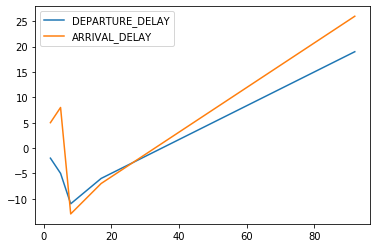

In [331]:
time = flights_df[flights_df["ORIGIN_AIRPORT"] == "SFO"]
SFO = time[["DEPARTURE_DELAY" , "ARRIVAL_DELAY"]].head().plot()

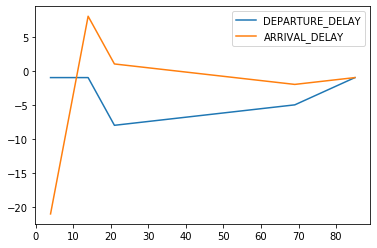

In [330]:
time = flights_df[flights_df["ORIGIN_AIRPORT"] == "SEA"]
SEA = time[["DEPARTURE_DELAY" , "ARRIVAL_DELAY"]].head().plot()


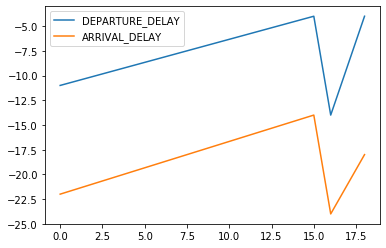

In [329]:
time = flights_df[flights_df["ORIGIN_AIRPORT"] == "ANC"]
ANC = time[["DEPARTURE_DELAY" , "ARRIVAL_DELAY"]].head().plot()

### 8. Определите для трёх выбранных аэропортов и визуализируйте задержки по каждой причине.

B    210
C     14
A     10
Name: CANCELLATION_REASON, dtype: int64


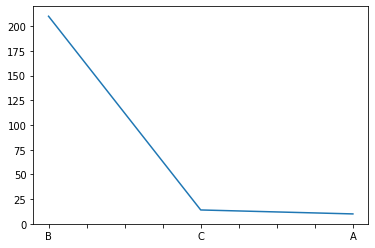

In [25]:
time = flights_df[flights_df["ORIGIN_AIRPORT"] == "PBI"]
reason = time["CANCELLATION_REASON"].value_counts()
print(reason)
reason.plot()

In [19]:
flights_df = pd.read_csv ('flights.csv', nrows=1000000)
print("flights")
print(flights_df.head())

flights
   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...         408.0   
1            LAX                 PBI                   10  ...         741.0   
2            SFO                 CLT                   20  ...         811.0   
3            LAX                 MIA                   20  ...         756.0   
4            SEA                 ANC                   25  ...         259.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0   

B    210
C     14
A     10
Name: CANCELLATION_REASON, dtype: int64


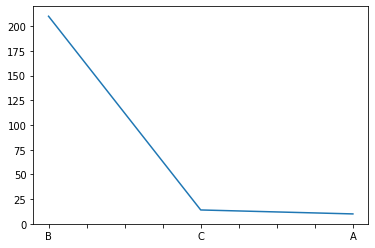

In [24]:
time = flights_df[flights_df["ORIGIN_AIRPORT"] == "PBI"]
reason = time["CANCELLATION_REASON"].value_counts()
print(reason)
reason.plot()

B    92
A    38
C     6
Name: CANCELLATION_REASON, dtype: int64


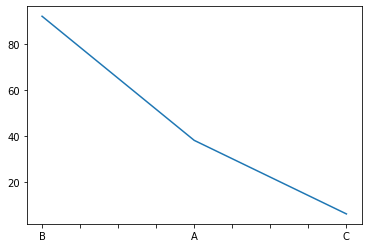

In [23]:
time = flights_df[flights_df["ORIGIN_AIRPORT"] == "SEA"]
reason = time["CANCELLATION_REASON"].value_counts()
print(reason)
reason.plot()

In [411]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6047 entries, 1 to 7438
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       5010 non-null   float64
 1   2       5496 non-null   float64
 2   3       5328 non-null   float64
 3   4       5470 non-null   float64
 4   5       5457 non-null   float64
 5   6       5308 non-null   float64
 6   7       3300 non-null   float64
dtypes: float64(7)
memory usage: 377.9 KB
